In [1]:
! ls

Gender_Prediction_tf.ipynb  launch.sh	   start.sh
exec_docker.sh		    run_docker.sh  stop.sh


In [2]:
! wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_crop.tar

--2021-01-26 04:11:47--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_crop.tar
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7012157440 (6.5G) [application/x-tar]
Saving to: ‘imdb_crop.tar’

imdb_crop.tar       100%[===================>]   6.53G  20.0MB/s    in 5m 38s  

2021-01-26 04:17:26 (19.8 MB/s) - ‘imdb_crop.tar’ saved [7012157440/7012157440]



In [3]:
! wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar
! tar -xvf wiki_crop.tar

--2021-01-26 04:17:26--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 811315200 (774M) [application/x-tar]
Saving to: ‘wiki_crop.tar’

wiki_crop.tar       100%[===================>] 773.73M  20.5MB/s    in 39s     

2021-01-26 04:18:07 (19.7 MB/s) - ‘wiki_crop.tar’ saved [811315200/811315200]



In [4]:
! ls
# using wiki_crop dataset only -download faces only part
# 100 folders + index file - wiki.mat

import scipy.io
mat = scipy.io.loadmat('wiki_crop/wiki.mat')

Gender_Prediction_tf.ipynb  launch.sh	   start.sh   wiki_crop.tar
exec_docker.sh		    nohup.out	   stop.sh
imdb_crop.tar		    run_docker.sh  wiki_crop


In [5]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jan 16 16:25:20 2016',
 '__version__': '1.0',
 '__globals__': [],
 'wiki': array([[(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
         array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
         array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
         array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
         array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
         array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
       dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
         array(['Dettmar Cramer'], dtype='<U14'),
         array(['Marc Okrand'], dtype='<U11'), ...,
         array(['Michael Wiesinger'], dtype='<U17'),
         array(['Johann Grugger

In [6]:
instances = mat['wiki'][0][0][0].shape[1]

columns = ['dob', 'photo_taken', 'full_path', 'gender', 'name', 'face_location', 'face_score', 'second_face_score']

import pandas as pd
df = pd.DataFrame(index=range(0,instances), columns=columns)

for i in mat:
    if i=='wiki':
        current_array = mat[i][0][0]
        for j in range(len(current_array)):
            df[columns[j]]=pd.DataFrame(current_array[j][0])
            


In [7]:
df.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN
1,703186,1964,[48/10000548_1925-04-04_1964.jpg],1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN
3,705061,1961,[65/10001965_1930-05-23_1961.jpg],1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN


In [8]:
# convert the dob from matlab datenum to python format
# we need birth year

from datetime import datetime, timedelta

def datenum_to_datetime(datenum):
    days = datenum%1
    hours = days%1 * 24
    minutes = hours%1 * 60
    seconds = minutes%1 * 60
    
    exact_date = datetime.fromordinal(int(datenum)) \
    + timedelta(days=int(days)) + timedelta(hours=int(hours))\
    + timedelta(minutes=int(minutes)) + timedelta(seconds=int(seconds)) \
    - timedelta(days=366)
    
    return exact_date.year

df['date_of_birth'] = df['dob'].apply(datenum_to_datetime)

In [9]:
df['date_of_birth']

0        1981
1        1925
2        1948
3        1930
4        1971
         ... 
62323    1937
62324    1947
62325    1972
62326    1981
62327    1954
Name: date_of_birth, Length: 62328, dtype: int64

In [10]:
# extracting the age 
df['age'] = df['photo_taken'] - df['date_of_birth']

In [2]:
! nvidia-smi

Tue Jan 26 18:34:52 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 452.56       Driver Version: 452.56       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1650   WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   47C    P8     6W /  N/A |   3746MiB /  4096MiB |     40%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [14]:
import numpy as np
# more data cleaning
# some images dont include people in dataset - vase
# some include 2 people at a time
# face score value - clarity of the image
# age info is missing for some records - that confuses the model
# Drop unncessary columns also to save memory

df = df[df['face_score'] != -np.inf]
df = df[df['second_face_score'].isna()]
df = df[~df['gender'].isna()]
df = df.drop(columns =['name', 'face_score', 'second_face_score', 'date_of_birth', 'face_location'])


In [13]:
df['face_score']

0        4.300962
1        2.645639
2        4.329329
4        3.408442
5        4.748056
           ...   
62321    3.868307
62322    3.735573
62323    4.029268
62325    3.494303
62327    5.486917
Name: face_score, Length: 44312, dtype: float64

In [19]:
# some images are for unborn people - age is negative
# this is due to dirty data
# restrict the age for 0 to 100

df = df[df['age'] < 100]
df = df[df['age'] > 0]


In [21]:
df['age']

0        28
2        60
4        41
5        52
6        34
         ..
62321    31
62322    25
62323    26
62325    41
62327    54
Name: age, Length: 39382, dtype: int64

In [22]:
df

,dob,photo_taken,full_path,gender,age
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,28
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,60
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,41
5,716189,2012,[02/10002702_1960-11-09_2012.jpg],0.0,52
6,707745,1971,[41/10003541_1937-09-27_1971.jpg],1.0,34
...,...,...,...,...,...
62321,707521,1968,[38/9996938_1937-02-15_1968.jpg],1.0,31
62322,709971,1968,[46/9996946_1943-11-01_1968.jpg],1.0,25
62323,707582,1963,[49/9996949_1937-04-17_1963.jpg],1.0,26
62325,720620,2013,[09/9998109_1972-12-27_2013.jpg],1.0,41


In [23]:
df = df.drop(columns=['dob','photo_taken'])

In [24]:
df
# final data found - cleaned and good to train model

,full_path,gender,age
0,[17/10000217_1981-05-05_2009.jpg],1.0,28
2,[12/100012_1948-07-03_2008.jpg],1.0,60
4,[16/10002116_1971-05-31_2012.jpg],0.0,41
5,[02/10002702_1960-11-09_2012.jpg],0.0,52
6,[41/10003541_1937-09-27_1971.jpg],1.0,34
...,...,...,...
62321,[38/9996938_1937-02-15_1968.jpg],1.0,31
62322,[46/9996946_1943-11-01_1968.jpg],1.0,25
62323,[49/9996949_1937-04-17_1963.jpg],1.0,26
62325,[09/9998109_1972-12-27_2013.jpg],1.0,41


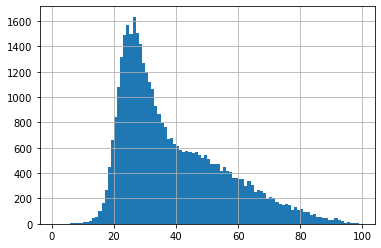

In [28]:
histogram_age = df['age'].hist(bins=df['age'].nunique())


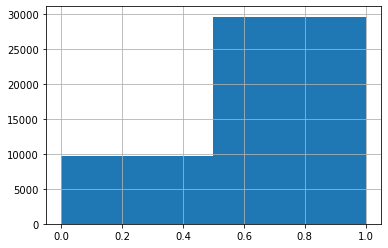

In [30]:
histogram_gender = df['gender'].hist(bins=df['gender'].nunique())

In [31]:
df['gender'].nunique()

2

In [4]:
df['age'].nunique()

In [40]:
from tensorflow.keras.preprocessing import image

In [41]:
# full path - shows the exact location of the image - we need its pixel value

target_size = (224, 224)

def getImagePixels(image_path):
    img = image.load_img('wiki_crop/%s' % image_path[0], grayscale=False, target_size=target_size)
    x = image.img_to_array(img).reshape(1,-1)[0]
    return x

df['pixels'] = df['full_path'].apply(getImagePixels)

In [39]:
! pip list
# ! pip install tensorflow-gpu==2.3.0

Package                            Version
---------------------------------- -------------------
absl-py                            0.11.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.10.0
anaconda-project                   0.8.3
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.4.2
astropy                            4.0.2
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.4
Babel                              2.8.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
beautifulsoup4                    

In [42]:
df

,full_path,gender,age,pixels
0,[17/10000217_1981-05-05_2009.jpg],1.0,28,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255..."
2,[12/100012_1948-07-03_2008.jpg],1.0,60,"[92.0, 97.0, 91.0, 89.0, 94.0, 90.0, 91.0, 96...."
4,[16/10002116_1971-05-31_2012.jpg],0.0,41,"[61.0, 30.0, 10.0, 61.0, 30.0, 10.0, 61.0, 30...."
5,[02/10002702_1960-11-09_2012.jpg],0.0,52,"[97.0, 122.0, 178.0, 97.0, 122.0, 178.0, 97.0,..."
6,[41/10003541_1937-09-27_1971.jpg],1.0,34,"[190.0, 189.0, 194.0, 204.0, 203.0, 208.0, 203..."
...,...,...,...,...
62321,[38/9996938_1937-02-15_1968.jpg],1.0,31,"[71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71...."
62322,[46/9996946_1943-11-01_1968.jpg],1.0,25,"[54.0, 54.0, 54.0, 44.0, 44.0, 44.0, 28.0, 28...."
62323,[49/9996949_1937-04-17_1963.jpg],1.0,26,"[41.0, 41.0, 41.0, 29.0, 29.0, 29.0, 22.0, 22...."
62325,[09/9998109_1972-12-27_2013.jpg],1.0,41,"[137.0, 174.0, 94.0, 137.0, 174.0, 94.0, 137.0..."


In [1]:
# saving cleaned data for futher use
df.to_pickle('withpixel_age_gender.pkl') 
# df = pd.read_pickle('withpixel_gender')